In [ ]:
#DATA DOWNLOAD 
#!git clone https://github.com/behenate/self_driving_car
#git clone https://github.com/rslim087a/track
!git clone https://github.com/aniruddha53/Track1
# DATA DOWNLOAD


fatal: destination path 'Track1' already exists and is not an empty directory.


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as npimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random


In [ ]:
# Load the data directory with pandas anda assign columns names
# Allow unlimited column width in pandas ourput (so the filenames dont get cut off)
# Show the first 5 rows of data
#datadir = 'self_driving_car'
datadir = 'Track1'
columns = ['center', 'left', 'right','steering','throttle','reverse','speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Aniruddha\Desktop\Self Driving Car Course Applied Deep Learning\Training Data for Autonomous Driving\IMG\center_2020_04_22_03_43_19_780.jpg,C:\Users\Aniruddha\Desktop\Self Driving Car Course Applied Deep Learning\Training Data for Autonomous Driving\IMG\left_2020_04_22_03_43_19_780.jpg,C:\Users\Aniruddha\Desktop\Self Driving Car Course Applied Deep Learning\Training Data for Autonomous Driving\IMG\right_2020_04_22_03_43_19_780.jpg,0.0,0.0,0,0.000078
1,C:\Users\Aniruddha\Desktop\Self Driving Car Course Applied Deep Learning\Training Data for Autonomous Driving\IMG\center_2020_04_22_03_43_19_881.jpg,C:\Users\Aniruddha\Desktop\Self Driving Car Course Applied Deep Learning\Training Data for Autonomous Driving\IMG\left_2020_04_22_03_43_19_881.jpg,C:\Users\Aniruddha\Desktop\Self Driving Car Course Applied Deep Learning\Training Data for Autonomous Driving\IMG\right_2020_04_22_03_43_19_881.jpg,0.0,0.0,0,0.000078
2,C:\Users\Aniruddha\Desktop\Self Driving Car Course Applied Deep Learning\Training Data for Autonomous Driving\IMG\center_2020_04_22_03_43_19_983.jpg,C:\Users\Aniruddha\Desktop\Self Driving Car Course Applied Deep Learning\Training Data for Autonomous Driving\IMG\left_2020_04_22_03_43_19_983.jpg,C:\Users\Aniruddha\Desktop\Self Driving Car Course Applied Deep Learning\Training Data for Autonomous Driving\IMG\right_2020_04_22_03_43_19_983.jpg,0.0,0.0,0,0.000078
3,C:\Users\Aniruddha\Desktop\Self Driving Car Course Applied Deep Learning\Training Data for Autonomous Driving\IMG\center_2020_04_22_03_43_20_088.jpg,C:\Users\Aniruddha\Desktop\Self Driving Car Course Applied Deep Learning\Training Data for Autonomous Driving\IMG\left_2020_04_22_03_43_20_088.jpg,C:\Users\Aniruddha\Desktop\Self Driving Car Course Applied Deep Learning\Training Data for Autonomous Driving\IMG\right_2020_04_22_03_43_20_088.jpg,0.0,0.0,0,0.000078
4,C:\Users\Aniruddha\Desktop\Self Driving Car Course Applied Deep Learning\Training Data for Autonomous Driving\IMG\center_2020_04_22_03_43_20_189.jpg,C:\Users\Aniruddha\Desktop\Self Driving Car Course Applied Deep Learning\Training Data for Autonomous Driving\IMG\left_2020_04_22_03_43_20_189.jpg,C:\Users\Aniruddha\Desktop\Self Driving Car Course Applied Deep Learning\Training Data for Autonomous Driving\IMG\right_2020_04_22_03_43_20_189.jpg,0.0,0.0,0,0.000078


In [ ]:
# Function which returns only the last part of the path
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail
# For each row of columns center, left, right apply the function
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()


,center,left,right,steering,throttle,reverse,speed
0,center_2020_04_22_03_43_19_780.jpg,left_2020_04_22_03_43_19_780.jpg,right_2020_04_22_03_43_19_780.jpg,0.0,0.0,0,0.000078
1,center_2020_04_22_03_43_19_881.jpg,left_2020_04_22_03_43_19_881.jpg,right_2020_04_22_03_43_19_881.jpg,0.0,0.0,0,0.000078
2,center_2020_04_22_03_43_19_983.jpg,left_2020_04_22_03_43_19_983.jpg,right_2020_04_22_03_43_19_983.jpg,0.0,0.0,0,0.000078
3,center_2020_04_22_03_43_20_088.jpg,left_2020_04_22_03_43_20_088.jpg,right_2020_04_22_03_43_20_088.jpg,0.0,0.0,0,0.000078
4,center_2020_04_22_03_43_20_189.jpg,left_2020_04_22_03_43_20_189.jpg,right_2020_04_22_03_43_20_189.jpg,0.0,0.0,0,0.000078


[-0.96 -0.88 -0.8  -0.72 -0.64 -0.56 -0.48 -0.4  -0.32 -0.24 -0.16 -0.08
  0.    0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72  0.8   0.88
  0.96]


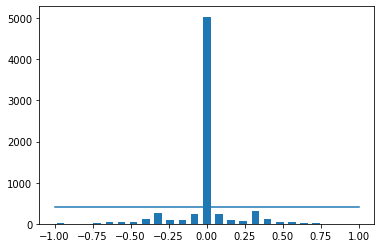

In [ ]:
# Create histogram with the data distributed into num_bins
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['steering'], bins=num_bins)
# make the data center in 0
center = (bins[:-1] + bins[1:]) / 2
print(center)
plt.bar(center, hist, width=0.05)
# Create a horizontal bar at height of 250, which represents our target data treshold
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))


total_data:  6950
removed:  4635
remaining data:  2315


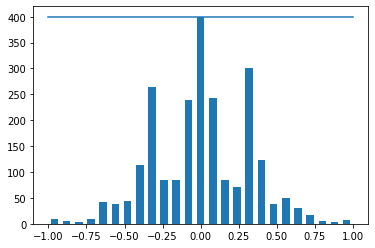

In [ ]:
print('total_data: ', len(data))
remove_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(data['steering'])):
        # If data belongs to the bin that is currently beion iterated
        if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
            list_.append(i)
    # shuffle the steering angles list
    list_ = shuffle(list_)
    # Select the data to be removed
    list_ = list_[samples_per_bin:]
    # apprend elements of tht list_ to the list of the elements that are supposed to be removed
    remove_list.extend(list_)
print('removed: ', len(remove_list))
# remove the data
data.drop(data.index[remove_list], inplace=True)
print('remaining data: ', len(data))

# Plot the new data distribution
hist, _ = np.histogram(data['steering'], bins=num_bins)
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))



In [ ]:
def load_img_steering(datadir,df):
    image_path = []
    steering = []
    for i in range(len(data)):
        # Select the data in the row i 
        indexed_data = data.iloc[i]
        center,left,right = indexed_data[0], indexed_data[1], indexed_data[2]
        # Append the center(only for now) from the current row "i" image path to the image paths
        image_path.append(os.path.join(datadir, center))
        # Append the steering angle from current row i
        steering.append(indexed_data[3])
        # left image append
        image_path.append(os.path.join(datadir,left.strip()))
        steering.append(float(indexed_data[3])+0.15)
        # right image append
        image_path.append(os.path.join(datadir,right.strip()))
        steering.append(float(indexed_data[3])-0.15)
        
          
    image_path = np.asarray(image_path)
    steering = np.asarray(steering)
    return image_path, steering

image_paths, steerings = load_img_steering(datadir + '/IMG', data)
# Split the data into  training and validation data 
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Train sapmples: {} \n Validation samples: {}'.format(X_train.shape[0], X_valid.shape[0]))



Train sapmples: 5556 
 Validation samples: 1389


Text(0.5, 1.0, 'Validation Sample')

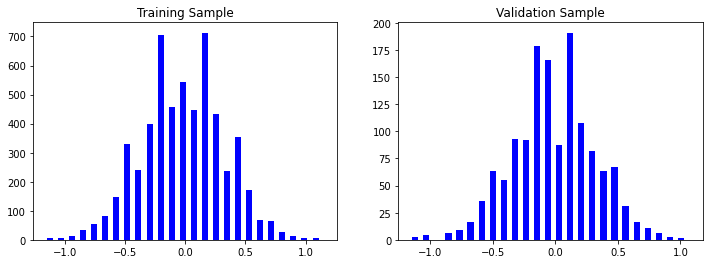

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training Sample')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='blue')
axes[1].set_title('Validation Sample')


In [ ]:
def zoom(image):
    zoom = iaa.Affine(scale=(1, 1.3))
    image = zoom.augment_image(image)
    return image

In [ ]:
def pan(image):
    pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
    image = pan.augment_image(image)
    return image

In [ ]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image

In [ ]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle

In [ ]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

In [ ]:
def random_augment(image, steering_angle):
    image = npimg.imread(image)
    if np.random.rand() < 0.5:
        image = pan(image)
    if np.random.rand() < 0.5:
        image = zoom(image)
    if np.random.rand() < 0.5:
        image = img_random_brightness(image)
    if np.random.rand() < 0.5:
        image, steering_angle = img_random_flip(image, steering_angle)
    
    return image, steering_angle



(66, 200, 3)


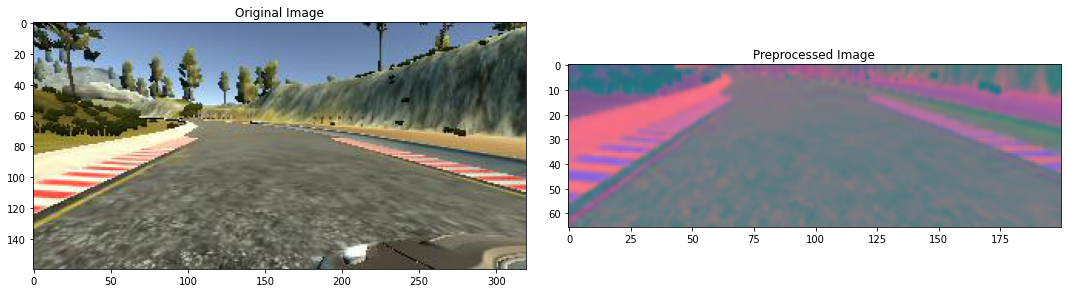

In [ ]:
image = image_paths[1000]
original_image = npimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, axs = plt.subplots(1,2, figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')
print(preprocessed_image.shape)

In [ ]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
    while True:
        batch_img = []
        batch_steering = []
        for i in range(batch_size):
            random_index = random.randint(0, len(image_paths) - 1)

            if istraining:
                im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
            else:
                im = npimg.imread(image_paths[random_index])
                steering = steering_ang[random_index]

            im = img_preprocess(im)
            batch_img.append(im)
            batch_steering.append(steering)
        yield (np.asarray(batch_img), np.asarray(batch_steering))  

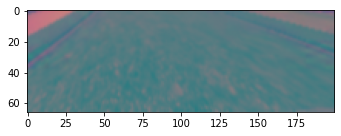

In [ ]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_val_gen, y_val_gen = next(batch_generator(X_train, y_train, 1, 0))
fig, axs = plt.subplots(1,1, figsize=(5,5))
fig.tight_layout()

axs.imshow(x_train_gen[0])

In [ ]:
def nvidia_model():
    model = Sequential()
    # Subsample is the same as stride length
    model.add(Convolution2D(24, 5, 5, subsample=(2,2), input_shape=(66,200,3), activation='elu'))
    model.add(Convolution2D(36, 5, 5, subsample=(2,2), activation='elu'))
    model.add(Convolution2D(48, 5, 5, subsample=(2,2), activation='elu'))
    model.add(Convolution2D(64, 3, 3, activation='elu'))
    model.add(Convolution2D(64, 3, 3, activation='elu'))
#     model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(100, activation='elu'))
#     model.add(Dropout(0.5))
    model.add(Dense(50, activation='elu'))
#     model.add(Dropout(0.5))
    model.add(Dense(10, activation='elu'))
#     model.add(Dropout(0.5))
    model.add(Dense(1))
    
    model.compile(optimizer = Adam(lr=1e-4), loss = 'mse')
    return model

In [ ]:
model = nvidia_model()
print(model.summary())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)              

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  


In [ ]:
h = model.fit_generator(batch_generator(X_train, y_train, 100, 1), 
                                        steps_per_epoch=300,
                                        epochs=10, 
                                        validation_data=batch_generator(X_valid, y_valid, 100, 0),
                                        validation_steps=200, 
                                        verbose=True, 
                                        shuffle=True)


Epoch 1/10
300/300 [==============================] - 223s 744ms/step - loss: 0.0936 - val_loss: 0.0398
Epoch 2/10
300/300 [==============================] - 217s 722ms/step - loss: 0.0737 - val_loss: 0.0727
Epoch 3/10
300/300 [==============================] - 218s 727ms/step - loss: 0.0707 - val_loss: 0.0425
Epoch 4/10
300/300 [==============================] - 218s 726ms/step - loss: 0.0653 - val_loss: 0.0349
Epoch 5/10
300/300 [==============================] - 215s 718ms/step - loss: 0.0636 - val_loss: 0.0483
Epoch 6/10
300/300 [==============================] - 216s 720ms/step - loss: 0.0605 - val_loss: 0.0606
Epoch 7/10
300/300 [==============================] - 211s 705ms/step - loss: 0.0601 - val_loss: 0.0431
Epoch 8/10
300/300 [==============================] - 213s 710ms/step - loss: 0.0585 - val_loss: 0.0406
Epoch 9/10
300/300 [==============================] - 217s 724ms/step - loss: 0.0571 - val_loss: 0.0407
Epoch 10/10
300/300 [==============================] - 215s 716m

In [ ]:
model.save('model.h5')
# IF ON GOOGLE COLAB UNCOMMENT THIS:
from google.colab import files
files.download('model.h5')
